In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = 'face_data'

def load_face_data_flat(data_dir, img_size=(64, 64)):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.png'):
            try:
                label = int(filename[7:9]) - 1  # 'subject01' → 0, 'subject15' → 14
                img_path = os.path.join(data_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                X.append(img / 255.0)
                y.append(label)
            except:
                print("Bỏ qua:", filename)
    return np.array(X)[..., np.newaxis], np.array(y)  # Thêm channel axis cho CNN

# Load và chia dữ liệu
X, y = load_face_data_flat(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
#a.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

from sklearn.metrics import classification_report

# Train
y_pred_train = np.argmax(cnn_model.predict(X_train), axis=1)
print("Train Metrics:")
print(classification_report(y_train, y_pred_train))

# Test
y_pred_test = np.argmax(cnn_model.predict(X_test), axis=1)
print("Test Metrics:")
print(classification_report(y_test, y_pred_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.0776 - loss: 2.7558 - val_accuracy: 0.3030 - val_loss: 2.4938
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.3179 - loss: 2.4511 - val_accuracy: 0.3939 - val_loss: 2.1435
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.4674 - loss: 1.9743 - val_accuracy: 0.6061 - val_loss: 1.6466
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6216 - loss: 1.4485 - val_accuracy: 0.6970 - val_loss: 1.2237
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.6910 - loss: 1.0781 - val_accuracy: 0.6061 - val_loss: 1.0962
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7276 - loss: 0.8611 - val_accuracy: 0.7576 - val_loss: 0.7716
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9568 - loss: 0.4597 - val_accuracy: 0.6970 - val_loss: 0.7853
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9009 - loss: 0.4059 - val_accuracy: 0.7879 - val_loss:

#b.
#Accuracy train: 98% → Mô hình học tốt trên dữ liệu huấn luyện.
#Accuracy test: 82% → Mô hình tổng quát hóa khá tốt trên dữ liệu chưa thấy.
#CNN học tốt và tổng quát tốt trên bài toán nhận dạng khuôn mặt với ảnh xám 64x64. Kết quả khả quan (~82% accuracy test) dù tập dữ liệu nhỏ và có nhiều lớp (

In [ ]:
#c.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

# Flatten ảnh
X_flat = X.reshape((X.shape[0], -1))

# Giảm chiều với PCA
pca = PCA(n_components=135)
X_pca = pca.fit_transform(X_flat)

# Tách tập train/test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Huấn luyện ANN
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
ann.fit(X_train_pca, y_train)

# Đánh giá
y_train_pred = ann.predict(X_train_pca)
y_test_pred = ann.predict(X_test_pca)

print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test - ANN):")
print(classification_report(y_test, y_test_pred))


Accuracy (Train): 1.0
Accuracy (Test): 0.8181818181818182

Classification Report (Test - ANN):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.50      0.50      0.50         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.75      1.00      0.86         3
           7       0.50      0.50      0.50         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         2

    accuracy                           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#SO SÁNH:
#CNN có độ chính xác cao hơn trên tập test (0.82 vs 0.76), cho thấy mô hình học được đặc trưng không gian ảnh tốt hơn sau giảm chiều bằng PCA.
#PCA + ANN có thể overfitting nhẹ (Train 1.0 nhưng Test chỉ 0.76).
#CNN giữ được sự ổn định giữa train và test, cho thấy khả năng tổng quát hóa tốt hơn.

In [ ]:
# Huấn luyện lại mô hình CNN trên toàn bộ dữ liệu
cnn_model.fit(X, y, epochs=10, batch_size=32)

# Huấn luyện lại PCA và ANN trên toàn bộ dữ liệu
X_flat = X.reshape((X.shape[0], -1))
X_pca = pca.fit_transform(X_flat)

ann.fit(X_pca, y)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.9744 - loss: 0.1396
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.9820 - loss: 0.0973
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9817 - loss: 0.0753
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 0.0392
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9895 - loss: 0.0431
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9983 - loss: 0.0152
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9936 - loss: 0.0441
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.9806 - loss: 0.0741
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 1.0000 - loss: 0.0247
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 1.0000 - loss: 0.0125


MLPClassifier(max_iter=300, random_state=42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


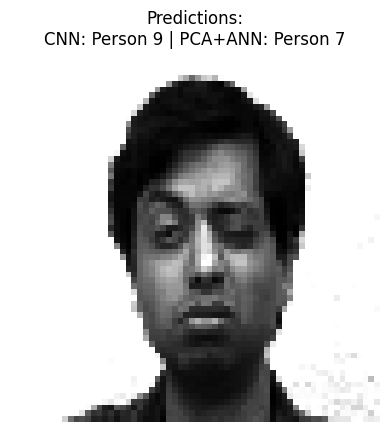

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


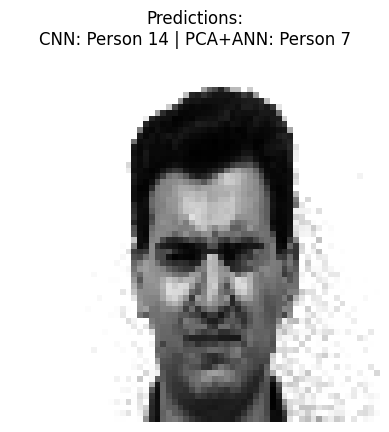

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


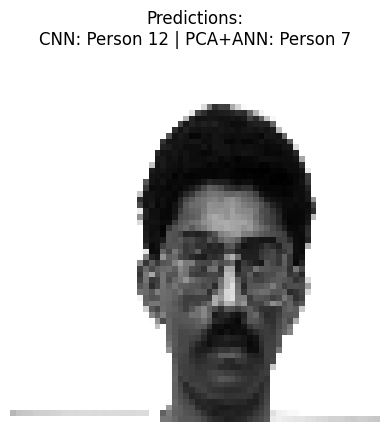

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


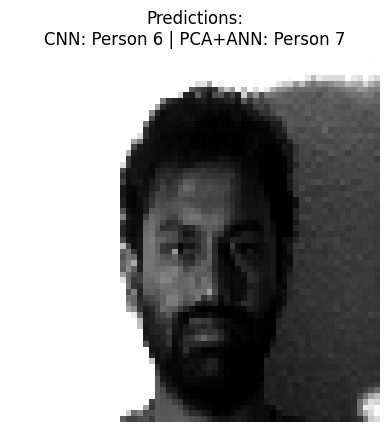

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


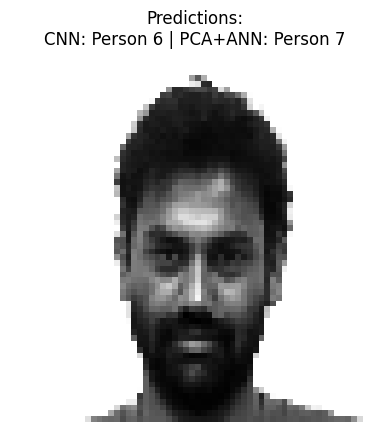

In [ ]:
import matplotlib.pyplot as plt
# Load và xử lý các ảnh mới (kích thước 320x243, khuôn mặt lệch bên phải)
image_dir = 'face_data'  # Đường dẫn tới thư mục chứa ảnh
image_files = os.listdir(image_dir)[:5]  # Lấy 5 ảnh đầu tiên từ thư mục

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)

    # Đọc ảnh và tiền xử lý
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64))  # Resize ảnh về kích thước 64x64 cho CNN
    img_normalized = img_resized / 255.0  # Chuẩn hóa ảnh về [0, 1]

    # Dự đoán với mô hình CNN
    cnn_input = np.expand_dims(img_normalized, axis=-1)  # Thêm channel axis
    cnn_pred = np.argmax(cnn_model.predict(np.expand_dims(cnn_input, axis=0)), axis=1)

    # Dự đoán với PCA + ANN
    img_flat = img_resized.flatten().reshape(1, -1)
    img_pca = pca.transform(img_flat)
    ann_pred = ann.predict(img_pca)

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predictions:\nCNN: Person {cnn_pred[0]} | PCA+ANN: Person {ann_pred[0]}")
    plt.axis('off')
    plt.show()
